# Grafico da ação escolhida


[*********************100%***********************]  1 of 1 completed


<Figure size 1200x500 with 0 Axes>

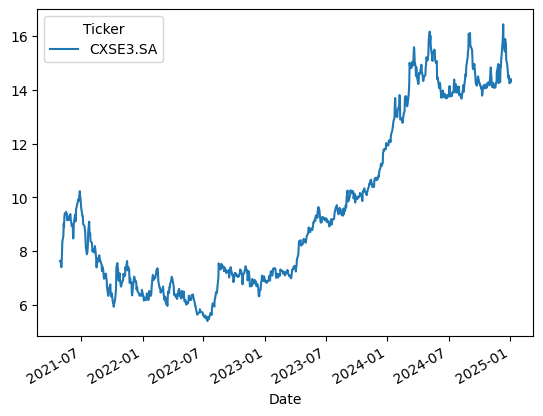

<Figure size 1200x500 with 0 Axes>

In [121]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

ativo = 'CXSE3.SA'

dados_ativo = yf.download(ativo, '2000-12-31')

dados_ativo

dados_ativo['Adj Close'].plot()

dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()

dados_ativo

dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)

dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(window=22).mean()

dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window=22).mean()

dados_ativo = dados_ativo.dropna()

dados_ativo['RSI'] = (100 - 100 / (1+dados_ativo['media_retornos_positivos']/dados_ativo['media_retornos_negativos']))

dados_ativo.head(50)

dados_ativo.loc[dados_ativo['RSI'] < 30 , 'compra'] = 'sim'

dados_ativo.loc[dados_ativo['RSI'] > 30 , 'compra'] = 'não'

datas_compra = []

datas_venda = []

for i in range(len(dados_ativo)):

  if "sim" in dados_ativo['compra'].iloc[i]:
    datas_compra.append(dados_ativo.iloc[i+1].name)
    for j in range(1,11):
      if dados_ativo['RSI'].iloc[i + j] > 40:
        datas_venda.append(dados_ativo.iloc[i + j + 1].name)
        break
      elif j == 10:
        datas_venda.append(dados_ativo.iloc[i + j + 1].name)

plt.figure(figsize=(12,5))












# Grafico compra / venda



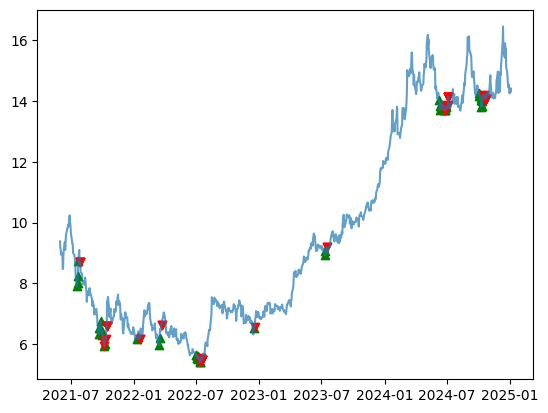

In [122]:
plt.scatter(dados_ativo.loc[datas_compra].index, dados_ativo.loc[datas_compra]['Adj Close'], marker='^', color='green')
plt.scatter(dados_ativo.loc[datas_venda].index, dados_ativo.loc[datas_venda]['Adj Close'], marker='v', color='red')

plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

# Percentual de operação com lucro


In [123]:
lucros = dados_ativo.loc[datas_venda]['Open'].values / dados_ativo.loc[datas_compra]['Open'].values - 1

operacoes_vecedoras = len(lucros[lucros > 0 ])/len(lucros)

operacoes_vecedoras = operacoes_vecedoras * 100

operacoes_vecedoras

63.46153846153846

# Media de ganhos


In [124]:
medias_ganhos = np.mean(lucros[lucros > 0])

medias_ganhos


0.038743594664602

# Media de perdas


In [125]:
medias_perdas = abs(np.mean(lucros[lucros < 0]))

medias_perdas


0.02620397232505509

# Perfomace acumulada


In [126]:
perfomace_acumulada = (np.cumprod((1 + lucros)) - 1) * 100

perfomace_acumulada

array([ 15.07245805,  31.65350412,  48.48419997,  62.99048266,
        57.18321717,  48.1475263 ,  38.67297233,  25.76204106,
        26.34971356,  29.51222173,  35.33477743,  44.58125589,
        59.81990004,  63.65882127,  68.87089565,  82.94346168,
       102.87037264,  91.90440358,  83.11908847,  79.96186584,
        80.48961273,  81.28472672,  81.02008404,  79.44599788,
        82.10841165,  87.03026908,  92.37399258,  99.31797309,
        99.31797309, 101.10823827,  96.87005757,  92.54026064,
        93.08186422,  90.13201154,  89.33201152,  89.99727062,
        91.06467001,  92.67137904,  92.53758917,  94.70246404,
        96.47745298,  99.38720416, 102.05506865, 103.18465562,
       100.67449042,  98.17474795,  97.90046444,  96.94508706,
        98.59661656, 100.12215773, 105.24256288, 109.89725847])

# Grafico lucratividade


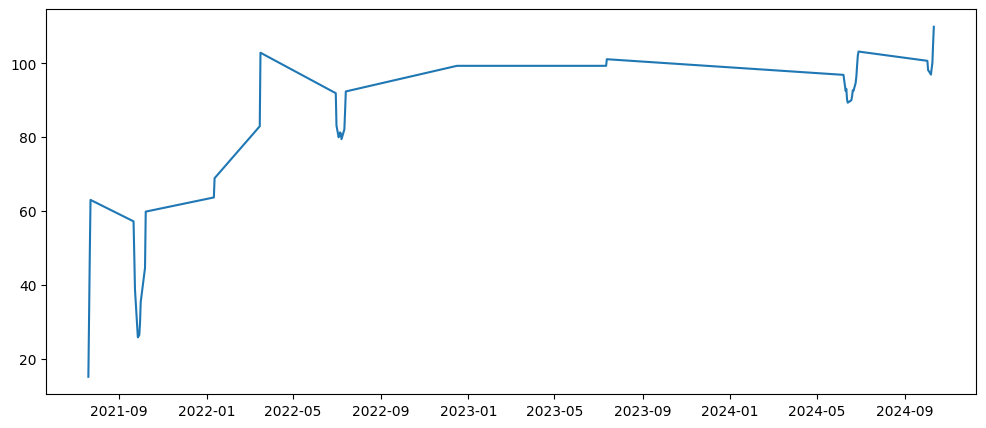

In [127]:
plt.figure(figsize=(12,5))

plt.plot(datas_compra, perfomace_acumulada)


Multiplas ações


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x500 with 0 Axes>

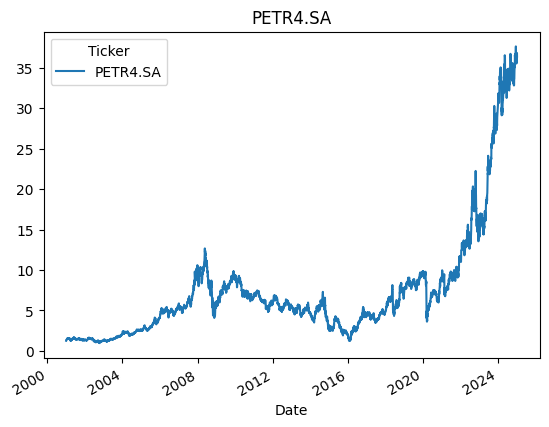

<Figure size 1200x500 with 0 Axes>

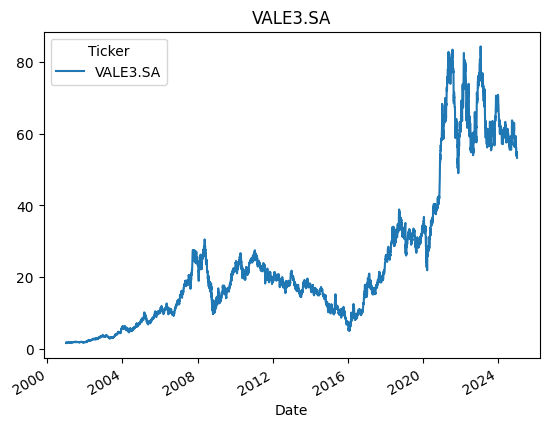

<Figure size 1200x500 with 0 Axes>

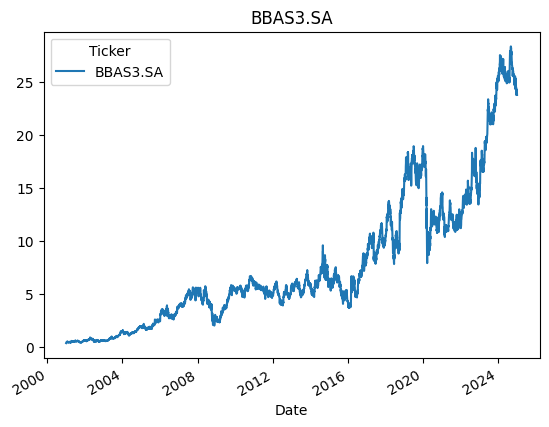

In [128]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

# Lista de ativos a serem analisados
ativos = ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA']  # Adicione mais ativos aqui

def analisar_ativo(ativo):
    dados_ativo = yf.download(ativo, '2000-12-31')

    # ... (resto do seu código de cálculo do RSI e geração de sinais)

    return dados_ativo

# Dicionário para armazenar os resultados de cada ativo
resultados = {}

for ativo in ativos:
    resultados[ativo] = analisar_ativo(ativo)

# Visualização dos resultados (exemplo)
for ativo, resultado in resultados.items():
    plt.figure(figsize=(12,5))
    resultado['Adj Close'].plot(title=ativo)
    plt.show()

# Sinal de compra e venda


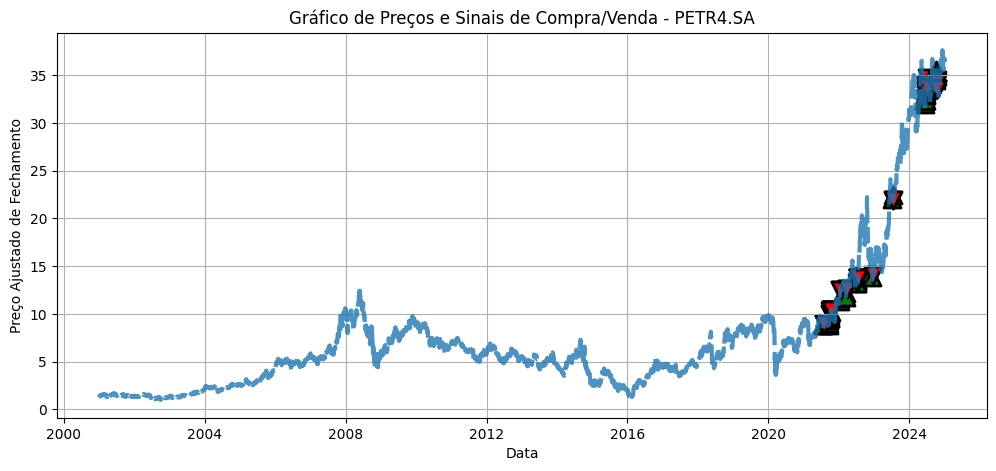

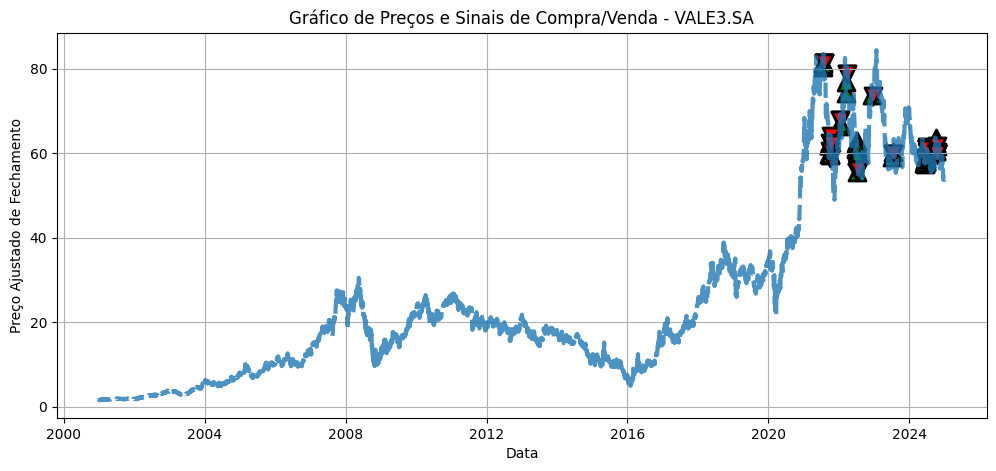

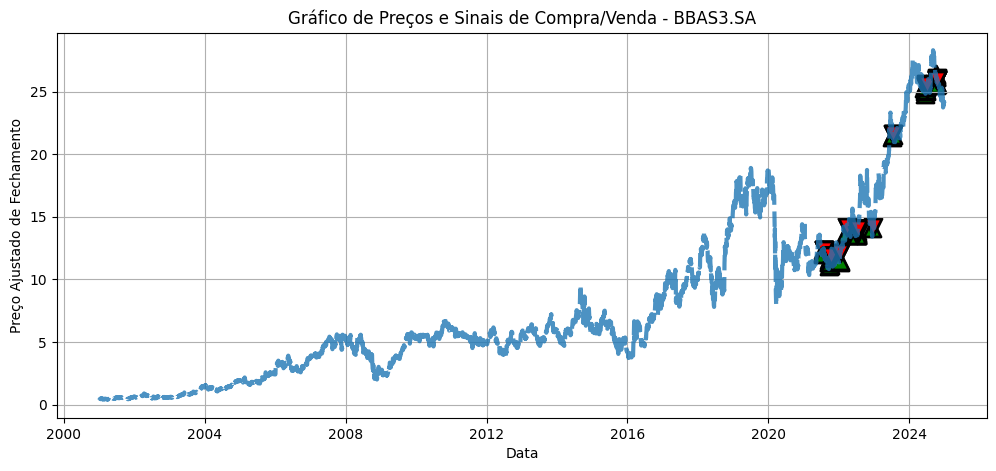

In [129]:
for ativo, resultado in resultados.items():
    plt.figure(figsize=(12,5))
    plt.scatter(resultado.loc[datas_compra].index, resultado.loc[datas_compra]['Adj Close'],
                marker='^', color='green', s=150, edgecolors='black', linewidths=2)
    plt.scatter(resultado.loc[datas_venda].index, resultado.loc[datas_venda]['Adj Close'],
                marker='v', color='red', s=150, edgecolors='black', linewidths=2)
    plt.plot(resultado['Adj Close'], alpha = 0.8, linewidth=3, linestyle='--')

    plt.title(f'Gráfico de Preços e Sinais de Compra/Venda - {ativo}')
    plt.xlabel('Data')
    plt.ylabel('Preço Ajustado de Fechamento')
    plt.grid(True)

    # Salvando o gráfico como uma imagem (opcional)
    plt.savefig(f'grafico_{ativo}.png')

    plt.show()

# Analise Ações da planilha

In [152]:
import pandas as pd
import yfinance as yf
import numpy as np

# Link da planilha Google Sheets exportada como CSV
google_sheets_url = "https://docs.google.com/spreadsheets/d/15ghbzfFs-V7I37pt_Dg54WI4BrM_sUSh2q3w_MAOlfs/export?format=csv&gid=0"

# Carregar a planilha diretamente no pandas
tickers_df = pd.read_csv(google_sheets_url)
ativos = tickers_df['acoes'].tolist()  # Nome correto da coluna com os tickers

def calcular_rsi(dados_ativo):
    dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()
    dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
    dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)
    dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(window=22).mean()
    dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window=22).mean()
    dados_ativo.dropna(inplace=True)
    dados_ativo['RSI'] = 100 - 100 / (1 + dados_ativo['media_retornos_positivos'] / dados_ativo['media_retornos_negativos'])
    return dados_ativo

# Percorrer todos os ativos e calcular o RSI
for ativo in ativos:
    print(f"Analisando {ativo}...")
    dados_ativo = yf.download(ativo, start='2000-12-31')
    if not dados_ativo.empty:
        dados_ativo = calcular_rsi(dados_ativo)
        ultimo_rsi = dados_ativo['RSI'].iloc[-1]  # Último valor de RSI
        if ultimo_rsi < 30:
            recomendacao_compra = f"Comprar amanhã (RSI = {ultimo_rsi:.2f})"
        else:
            recomendacao_compra = f"Não comprar amanhã (RSI = {ultimo_rsi:.2f})"

        if ultimo_rsi > 40:
            recomendacao_venda = f"Vender amanhã (RSI = {ultimo_rsi:.2f})"
        else:
            recomendacao_venda = f"Não vender amanhã (RSI = {ultimo_rsi:.2f})"

        print(f"Recomendação para {ativo}")
        print({recomendacao_compra})
        print({recomendacao_venda})
    else:
        print(f"Dados não disponíveis para {ativo}")

    print("\n")






Analisando PETR4.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para PETR4.SA
{'Não comprar amanhã (RSI = 54.12)'}
{'Vender amanhã (RSI = 54.12)'}


Analisando VALE3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para VALE3.SA
{'Não comprar amanhã (RSI = 38.84)'}
{'Não vender amanhã (RSI = 38.84)'}


Analisando BBAS3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Recomendação para BBAS3.SA
{'Não comprar amanhã (RSI = 45.70)'}
{'Vender amanhã (RSI = 45.70)'}


Analisando ENEV3.SA...



[*********************100%***********************]  1 of 1 completed


Recomendação para ENEV3.SA
{'Não comprar amanhã (RSI = 35.72)'}
{'Não vender amanhã (RSI = 35.72)'}


Analisando CXSE3.SA...
Recomendação para CXSE3.SA
{'Não comprar amanhã (RSI = 51.07)'}
{'Vender amanhã (RSI = 51.07)'}


Analisando BBSE3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para BBSE3.SA
{'Não comprar amanhã (RSI = 67.36)'}
{'Vender amanhã (RSI = 67.36)'}


Analisando BBAS3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para BBAS3.SA
{'Não comprar amanhã (RSI = 45.70)'}
{'Vender amanhã (RSI = 45.70)'}


Analisando PETR3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Recomendação para PETR3.SA
{'Não comprar amanhã (RSI = 56.80)'}
{'Vender amanhã (RSI = 56.80)'}


Analisando TAEE11.SA...


Recomendação para TAEE11.SA
{'Não comprar amanhã (RSI = 40.85)'}
{'Vender amanhã (RSI = 40.85)'}


Analisando EGIE3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para EGIE3.SA
{'Não comprar amanhã (RSI = 39.92)'}
{'Não vender amanhã (RSI = 39.92)'}


Analisando WEGE3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para WEGE3.SA
{'Não comprar amanhã (RSI = 49.04)'}
{'Vender amanhã (RSI = 49.04)'}


Analisando LEVE3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para LEVE3.SA
{'Não comprar amanhã (RSI = 48.23)'}
{'Vender amanhã (RSI = 48.23)'}


Analisando KLBN3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para KLBN3.SA
{'Não comprar amanhã (RSI = 62.55)'}
{'Vender amanhã (RSI = 62.55)'}


Analisando SYNE3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Recomendação para SYNE3.SA
{'Não comprar amanhã (RSI = 43.77)'}
{'Vender amanhã (RSI = 43.77)'}


Analisando ALLD3.SA...
Recomendação para ALLD3.SA
{'Não comprar amanhã (RSI = 36.60)'}
{'Não vender amanhã (RSI = 36.60)'}


Analisando ANIM3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para ANIM3.SA
{'Não comprar amanhã (RSI = 30.06)'}
{'Não vender amanhã (RSI = 30.06)'}


Analisando PATI3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para PATI3.SA
{'Não comprar amanhã (RSI = 37.27)'}
{'Não vender amanhã (RSI = 37.27)'}


Analisando EKTR3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para EKTR3.SA
{'Não comprar amanhã (RSI = 100.00)'}
{'Vender amanhã (RSI = 100.00)'}


Analisando VULC3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para VULC3.SA
{'Não comprar amanhã (RSI = 40.61)'}
{'Vender amanhã (RSI = 40.61)'}


Analisando SCAR3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Recomendação para SCAR3.SA
{'Não comprar amanhã (RSI = 39.06)'}
{'Não vender amanhã (RSI = 39.06)'}


Analisando MRFG3.SA...



[*********************100%***********************]  1 of 1 completed

Recomendação para MRFG3.SA
{'Não comprar amanhã (RSI = 57.12)'}
{'Vender amanhã (RSI = 57.12)'}


Analisando EVEN3.SA...
Recomendação para EVEN3.SA
{'Não comprar amanhã (RSI = 40.65)'}
{'Vender amanhã (RSI = 40.65)'}


Analisando RECV3.SA...


[*********************100%***********************]  1 of 1 completed



Recomendação para RECV3.SA
{'Não comprar amanhã (RSI = 52.34)'}
{'Vender amanhã (RSI = 52.34)'}


Analisando CGAS3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para CGAS3.SA
{'Não comprar amanhã (RSI = 56.98)'}
{'Vender amanhã (RSI = 56.98)'}


Analisando CSNA3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Recomendação para CSNA3.SA
{'Comprar amanhã (RSI = 25.52)'}
{'Não vender amanhã (RSI = 25.52)'}


Analisando CMIN3.SA...
Recomendação para CMIN3.SA
{'Não comprar amanhã (RSI = 45.66)'}
{'Vender amanhã (RSI = 45.66)'}


Analisando BRAP4.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para BRAP4.SA
{'Não comprar amanhã (RSI = 31.74)'}
{'Não vender amanhã (RSI = 31.74)'}


Analisando ODPV3.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Recomendação para ODPV3.SA
{'Não comprar amanhã (RSI = 45.67)'}
{'Vender amanhã (RSI = 45.67)'}


Analisando PINE4.SA...



[*********************100%***********************]  1 of 1 completed

Recomendação para PINE4.SA
{'Não comprar amanhã (RSI = 46.80)'}
{'Vender amanhã (RSI = 46.80)'}


Analisando EQPA3.SA...



[*********************100%***********************]  1 of 1 completed


Recomendação para EQPA3.SA
{'Não comprar amanhã (RSI = 49.57)'}
{'Vender amanhã (RSI = 49.57)'}


Analisando LOGG3.SA...
Recomendação para LOGG3.SA
{'Não comprar amanhã (RSI = 47.57)'}
{'Vender amanhã (RSI = 47.57)'}


Analisando CSMG3.SA...


[*********************100%***********************]  1 of 1 completed


Recomendação para CSMG3.SA
{'Não comprar amanhã (RSI = 30.36)'}
{'Não vender amanhã (RSI = 30.36)'}


Analisando CMIG4.SA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Recomendação para CMIG4.SA
{'Não comprar amanhã (RSI = 44.77)'}
{'Vender amanhã (RSI = 44.77)'}


Analisando DIRR3.SA...
Recomendação para DIRR3.SA
{'Não comprar amanhã (RSI = 45.25)'}
{'Vender amanhã (RSI = 45.25)'}


Analisando MELK3.SA...


[*********************100%***********************]  1 of 1 completed

Recomendação para MELK3.SA
{'Não comprar amanhã (RSI = 56.97)'}
{'Vender amanhã (RSI = 56.97)'}




# Ações para comprar


In [169]:
# Lista para armazenar ações que devem ser compradas
acoes_para_comprar = []

# Percorrer todos os ativos e calcular o RSI
for ativo in tqdm(ativos, desc="Analisando ativos", ncols=100, unit="ativo"):  # Barra de progresso
    dados_ativo = yf.download(ativo, start='2000-12-31', progress=False)  # Suprimir logs de download

    if not dados_ativo.empty:
        dados_ativo = calcular_rsi(dados_ativo)
        ultimo_rsi = dados_ativo['RSI'].iloc[-1]  # Último valor de RSI

        # Diagnóstico: exibir o último valor de RSI para cada ativo
        print(f"RSI de {ativo}: {ultimo_rsi:.2f}")

        if ultimo_rsi < 30:  # Condição para compra
            acoes_para_comprar.append(ativo)  # Adicionar à lista de ações para compra
    else:
        print(f"Dados não disponíveis para {ativo}")

    print("\n")  # Linha em branco para separar os resultados

# Exibir as ações que devem ser compradas
if acoes_para_comprar:
    print("Ações para comprar amanhã:")
    for acao in acoes_para_comprar:
        print(acao)
else:
    print("Nenhuma ação para comprar amanhã.")


Analisando ativos:   3%|█▏                                        | 1/35 [00:00<00:12,  2.80ativo/s]

RSI de PETR4.SA: 54.12




Analisando ativos:   6%|██▍                                       | 2/35 [00:00<00:14,  2.28ativo/s]

RSI de VALE3.SA: 38.84




Analisando ativos:  11%|████▊                                     | 4/35 [00:01<00:09,  3.25ativo/s]

RSI de BBAS3.SA: 45.70


RSI de ENEV3.SA: 35.72




Analisando ativos:  17%|███████▏                                  | 6/35 [00:01<00:06,  4.44ativo/s]

RSI de CXSE3.SA: 51.07


RSI de BBSE3.SA: 67.36




Analisando ativos:  20%|████████▍                                 | 7/35 [00:01<00:06,  4.14ativo/s]

RSI de BBAS3.SA: 45.70




Analisando ativos:  23%|█████████▌                                | 8/35 [00:02<00:06,  4.07ativo/s]

RSI de PETR3.SA: 56.80




Analisando ativos:  26%|██████████▊                               | 9/35 [00:02<00:06,  4.08ativo/s]

RSI de TAEE11.SA: 40.85




Analisando ativos:  29%|███████████▋                             | 10/35 [00:02<00:06,  3.82ativo/s]

RSI de EGIE3.SA: 39.92




Analisando ativos:  31%|████████████▉                            | 11/35 [00:03<00:06,  3.76ativo/s]

RSI de WEGE3.SA: 49.04




Analisando ativos:  34%|██████████████                           | 12/35 [00:03<00:06,  3.63ativo/s]

RSI de LEVE3.SA: 48.23




Analisando ativos:  37%|███████████████▏                         | 13/35 [00:03<00:05,  3.69ativo/s]

RSI de KLBN3.SA: 62.55




Analisando ativos:  43%|█████████████████▌                       | 15/35 [00:03<00:04,  4.48ativo/s]

RSI de SYNE3.SA: 43.77


RSI de ALLD3.SA: 36.60




Analisando ativos:  46%|██████████████████▋                      | 16/35 [00:04<00:04,  4.56ativo/s]

RSI de ANIM3.SA: 30.06




Analisando ativos:  49%|███████████████████▉                     | 17/35 [00:04<00:04,  4.34ativo/s]

RSI de PATI3.SA: 37.27




Analisando ativos:  51%|█████████████████████                    | 18/35 [00:04<00:03,  4.37ativo/s]

RSI de EKTR3.SA: 100.00




Analisando ativos:  54%|██████████████████████▎                  | 19/35 [00:04<00:03,  4.19ativo/s]

RSI de VULC3.SA: 40.61




Analisando ativos:  57%|███████████████████████▍                 | 20/35 [00:05<00:04,  3.28ativo/s]

RSI de SCAR3.SA: 39.06




Analisando ativos:  63%|█████████████████████████▊               | 22/35 [00:05<00:03,  3.92ativo/s]

RSI de MRFG3.SA: 57.12


RSI de EVEN3.SA: 40.65




Analisando ativos:  66%|██████████████████████████▉              | 23/35 [00:05<00:02,  4.64ativo/s]

RSI de RECV3.SA: 52.34




Analisando ativos:  69%|████████████████████████████             | 24/35 [00:06<00:02,  4.35ativo/s]

RSI de CGAS3.SA: 56.98




Analisando ativos:  74%|██████████████████████████████▍          | 26/35 [00:06<00:01,  4.79ativo/s]

RSI de CSNA3.SA: 25.52


RSI de CMIN3.SA: 45.66




Analisando ativos:  77%|███████████████████████████████▋         | 27/35 [00:06<00:02,  3.85ativo/s]

RSI de BRAP4.SA: 31.74




Analisando ativos:  80%|████████████████████████████████▊        | 28/35 [00:07<00:01,  3.57ativo/s]

RSI de ODPV3.SA: 45.67




Analisando ativos:  83%|█████████████████████████████████▉       | 29/35 [00:07<00:01,  3.40ativo/s]

RSI de PINE4.SA: 46.80




Analisando ativos:  89%|████████████████████████████████████▎    | 31/35 [00:08<00:01,  3.78ativo/s]

RSI de EQPA3.SA: 49.57


RSI de LOGG3.SA: 47.57




Analisando ativos:  91%|█████████████████████████████████████▍   | 32/35 [00:08<00:00,  3.65ativo/s]

RSI de CSMG3.SA: 30.36




Analisando ativos:  94%|██████████████████████████████████████▋  | 33/35 [00:08<00:00,  3.33ativo/s]

RSI de CMIG4.SA: 44.77




Analisando ativos: 100%|█████████████████████████████████████████| 35/35 [00:09<00:00,  3.81ativo/s]

RSI de DIRR3.SA: 45.25


RSI de MELK3.SA: 56.97


Ações para comprar amanhã:
CSNA3.SA


# Ações para vender


In [168]:
# Lista para armazenar ações que devem ser vendidas
acoes_para_vender = []

# Percorrer todos os ativos e calcular o RSI para venda
for ativo in tqdm(ativos, desc="Analisando ativos para venda", ncols=100, unit="ativo"):  # Barra de progresso
    dados_ativo = yf.download(ativo, start='2000-12-31', progress=False)  # Suprimir logs de download

    if not dados_ativo.empty:
        dados_ativo = calcular_rsi(dados_ativo)
        ultimo_rsi = dados_ativo['RSI'].iloc[-1]  # Último valor de RSI

        # Condição para venda (RSI acima de 40)
        if ultimo_rsi > 40:
            acoes_para_vender.append(ativo)  # Adicionar à lista de ações para venda
    else:
        print(f"Dados não disponíveis para {ativo}")

    print("\n")  # Linha em branco para separar os resultados

# Exibir as ações para venda
if acoes_para_vender:
    print("Ações para vender amanhã:")
    for acao in acoes_para_vender:
        print(acao)
else:
    print("Nenhuma ação para vender amanhã.")


Analisando ativos para venda:   3%|▉                              | 1/35 [00:00<00:11,  2.88ativo/s]

Analisando ativos para venda:   6%|█▊                             | 2/35 [00:00<00:10,  3.11ativo/s]

Analisando ativos para venda:   9%|██▋                            | 3/35 [00:00<00:10,  3.13ativo/s]

Analisando ativos para venda:  14%|████▍                          | 5/35 [00:01<00:06,  4.38ativo/s]

Analisando ativos para venda:  17%|█████▎                         | 6/35 [00:01<00:06,  4.62ativo/s]

Analisando ativos para venda:  20%|██████▏                        | 7/35 [00:01<00:06,  4.25ativo/s]

Analisando ativos para venda:  23%|███████                        | 8/35 [00:02<00:07,  3.83ativo/s]

Analisando ativos para venda:  26%|███████▉                       | 9/35 [00:02<00:07,  3.62ativo/s]

Analisando ativos para venda:  29%|████████▌                     | 10/35 [00:02<00:07,  3.49ativo/s]

Analisando ativos para venda:  31%|█████████▍                    | 11/35 [00:03<00:07,  3.21ativo/s]

Analisando ativos para venda:  34%|██████████▎                   | 12/35 [00:03<00:09,  2.48ativo/s]

Analisando ativos para venda:  37%|███████████▏                  | 13/35 [00:04<00:08,  2.65ativo/s]

Analisando ativos para venda:  43%|████████████▊                 | 15/35 [00:04<00:06,  3.25ativo/s]

Analisando ativos para venda:  46%|█████████████▋                | 16/35 [00:04<00:05,  3.53ativo/s]

Analisando ativos para venda:  49%|██████████████▌               | 17/35 [00:05<00:05,  3.27ativo/s]

Analisando ativos para venda:  51%|███████████████▍              | 18/35 [00:05<00:04,  3.48ativo/s]

Analisando ativos para venda:  54%|████████████████▎             | 19/35 [00:05<00:04,  3.62ativo/s]

Analisando ativos para venda:  57%|█████████████████▏            | 20/35 [00:05<00:03,  3.85ativo/s]

Analisando ativos para venda:  60%|██████████████████            | 21/35 [00:06<00:03,  3.75ativo/s]

Analisando ativos para venda:  66%|███████████████████▋          | 23/35 [00:06<00:02,  4.64ativo/s]

Analisando ativos para venda:  69%|████████████████████▌         | 24/35 [00:06<00:02,  4.54ativo/s]

Analisando ativos para venda:  74%|██████████████████████▎       | 26/35 [00:07<00:01,  5.14ativo/s]

Analisando ativos para venda:  77%|███████████████████████▏      | 27/35 [00:07<00:01,  4.62ativo/s]

Analisando ativos para venda:  80%|████████████████████████      | 28/35 [00:07<00:01,  4.30ativo/s]

Analisando ativos para venda:  83%|████████████████████████▊     | 29/35 [00:07<00:01,  4.40ativo/s]

Analisando ativos para venda:  89%|██████████████████████████▌   | 31/35 [00:08<00:00,  4.94ativo/s]

Analisando ativos para venda:  91%|███████████████████████████▍  | 32/35 [00:08<00:00,  4.72ativo/s]

Analisando ativos para venda:  97%|█████████████████████████████▏| 34/35 [00:08<00:00,  4.64ativo/s]

Analisando ativos para venda: 100%|██████████████████████████████| 35/35 [00:09<00:00,  3.86ativo/s]



Ações para vender amanhã:
PETR4.SA
BBAS3.SA
CXSE3.SA
BBSE3.SA
BBAS3.SA
PETR3.SA
TAEE11.SA
WEGE3.SA
LEVE3.SA
KLBN3.SA
SYNE3.SA
EKTR3.SA
VULC3.SA
MRFG3.SA
EVEN3.SA
RECV3.SA
CGAS3.SA
CMIN3.SA
ODPV3.SA
PINE4.SA
EQPA3.SA
LOGG3.SA
CMIG4.SA
DIRR3.SA
MELK3.SA
